<a href="https://colab.research.google.com/github/Ibocan1999/IE423/blob/main/notebooks/Finalrev0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

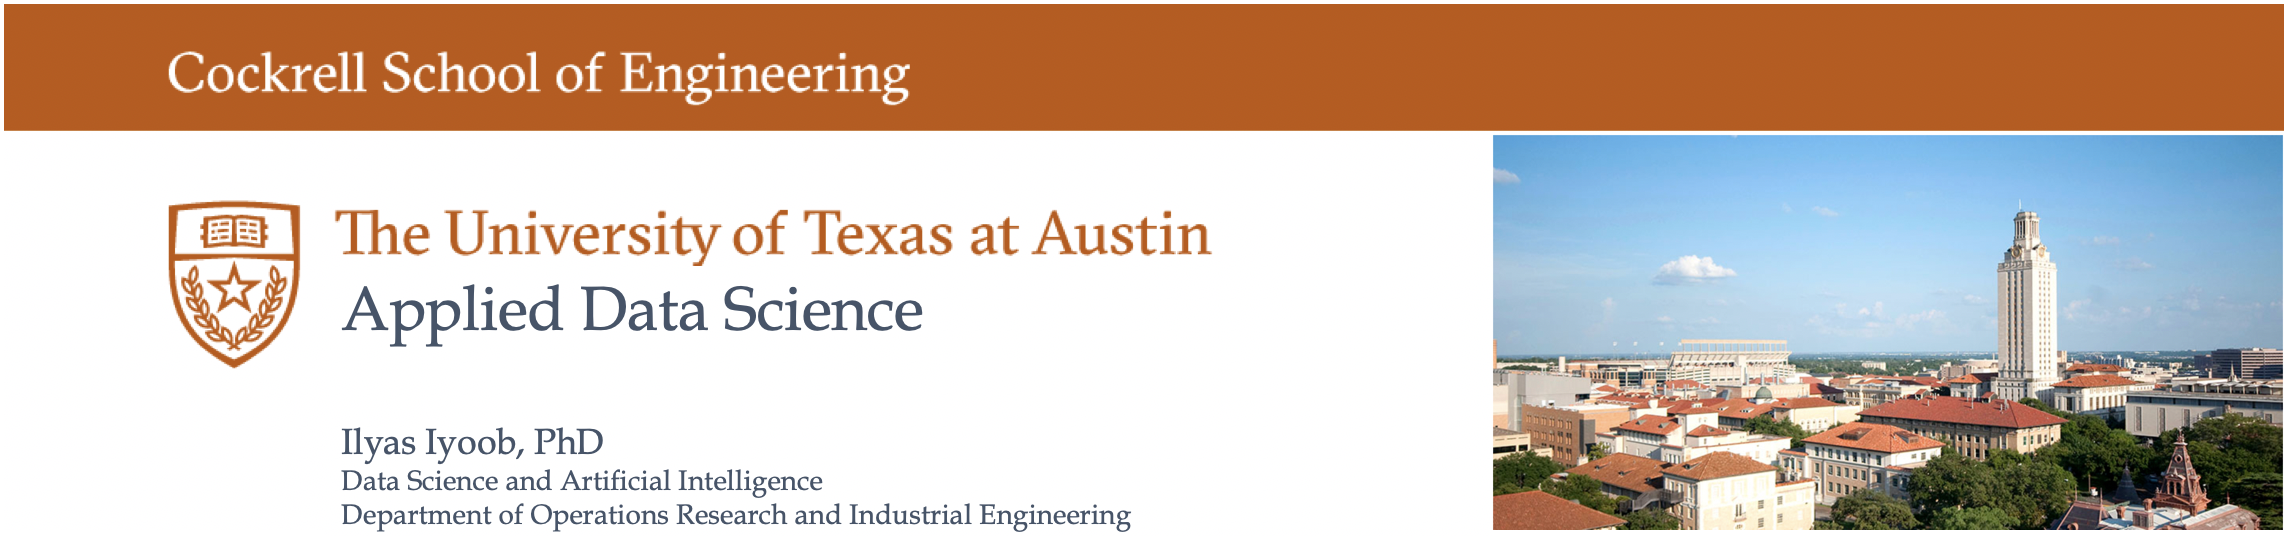

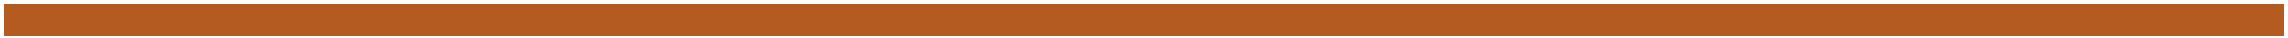

## <font color='#475468'> Heart Disease:</font>
### <font color='#475468'> Can you predict heart disease in patients?</font>

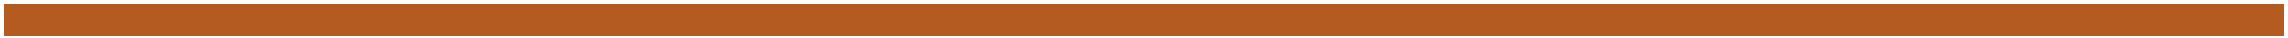

## Initialize

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

### Load Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
dfFinal = pd.read_csv('/content/drive/MyDrive/IE-423/online_shoppers_intention.csv')

In [ ]:
dfFinal.head()

## 1- Exploratory Data Analysis (EDA)

EDA is performed to understand the structure and content of the dataset, identifying any issues such as missing values or outliers. It helps uncover relationships and patterns between variables, guiding data preprocessing and feature engineering. By visualizing distributions and correlations, EDA informs model selection and ensures the data is well-prepared for analysis. Ultimately, EDA provides crucial insights that lead to more accurate and meaningful results in the project.

### 1.1 Summarize the Dataset.

The dataset consists of 18 features and one target variable (Revenue), which indicates whether a visitor made a purchase. The features include numerical variables like the number of pages visited (Administrative, Informational, ProductRelated), the time spent on these pages (Administrative_Duration, Informational_Duration, ProductRelated_Duration), and metrics like BounceRates and ExitRates. Categorical features include Month, OperatingSystems, Browser, Region, TrafficType, VisitorType, and Weekend. The dataset appears complete with no missing values and includes a mix of visitor behavior data, session characteristics, and contextual information.

1. Administrative:
Description: This feature represents the number of pages a visitor accessed related to account management (such as logging in, managing account details, etc.).
Data Type: Numerical (integer).
Interpretation: Higher values may indicate that a user is involved in activities related to account management, which could be linked to the seriousness of their purchase intent.

2. Administrative_Duration:
Description: The total time (in seconds) a visitor spent on pages related to account management.
Data Type: Numerical (float).
Interpretation: Longer durations could suggest a user is engaged in complex account-related tasks or encountering issues, which might affect their likelihood of making a purchase.

3. Informational:
Description: The number of pages a visitor accessed that provide information about the website, products, or services.
Data Type: Numerical (integer).
Interpretation: A higher number indicates that the visitor is exploring information, possibly researching before making a decision.

4. Informational_Duration:
Description: The total time (in seconds) a visitor spent on informational pages.
Data Type: Numerical (float).
Interpretation: More time spent on these pages could indicate thorough research or difficulty finding information, which could influence purchase decisions.

5. ProductRelated:
Description: The number of pages a visitor accessed that are related to viewing or interacting with products (such as product listings or details pages).
Data Type: Numerical (integer).
Interpretation: This is a key indicator of user interest in products. Higher values suggest more extensive browsing, which may correlate with purchase intent.

6. ProductRelated_Duration:
Description: The total time (in seconds) a visitor spent on product-related pages.
Data Type: Numerical (float).
Interpretation: More time spent on these pages could indicate a strong interest in products, which might increase the likelihood of a purchase.

7. BounceRates:
Description: The percentage of visitors who enter the site and then leave without interacting further (i.e., they only visit one page).
Data Type: Numerical (float).
Interpretation: Higher bounce rates can suggest that the landing page is not engaging or relevant to the visitor's needs, leading to early exits from the site.

8. ExitRates:
Description: The percentage of pageviews where that page was the last in the session.
Data Type: Numerical (float).
Interpretation: A high exit rate on specific pages might indicate issues with those pages, such as poor content, user interface problems, or other barriers to conversion.

9. PageValues:
Description: The average value of a page that was visited before completing an e-commerce transaction. This value is calculated from the conversion rates and the value of the transaction.
Data Type: Numerical (float).
Interpretation: Higher values suggest that pages visited have a stronger association with eventual transactions, indicating their importance in the conversion process.

10. SpecialDay:
Description: This feature represents the closeness of the site visit date to a special day (e.g., holidays). It is a normalized score between 0 and 1, with 1 indicating the visit is on a special day.
Data Type: Numerical (float).
Interpretation: Visits closer to special days might be associated with holiday promotions or events, possibly increasing the likelihood of a purchase.

11. Month:
Description: The month of the year when the visit occurred, represented as a categorical variable.
Data Type: Categorical (string).
Interpretation: Analyzing this feature can help identify seasonal trends or patterns in user behavior and purchasing habits.

12. OperatingSystems:
Description: The operating system used by the visitor during the session (e.g., Windows, MacOS, etc.), represented as an integer code.
Data Type: Categorical (integer).
Interpretation: This can provide insights into the user demographics or preferences, which might affect site performance and user experience.

13. Browser:
Description: The browser used by the visitor during the session (e.g., Chrome, Firefox, etc.), represented as an integer code.
Data Type: Categorical (integer).
Interpretation: Like the operating system, the browser used can influence the user experience, and certain browsers may be more common among purchasing users.

14. Region:
Description: The geographical region from which the session was initiated, represented as an integer code.
Data Type: Categorical (integer).
Interpretation: This feature can reveal regional differences in user behavior and conversion rates, useful for targeting marketing efforts.

15. TrafficType:
Description: The type of traffic source that brought the visitor to the website, represented as an integer code (e.g., direct traffic, referral, organic search).
Data Type: Categorical (integer).
Interpretation: Understanding which traffic sources lead to higher engagement or purchases can help in optimizing marketing and acquisition strategies.

16. VisitorType:
Description: Indicates whether the visitor is a new or returning visitor, with categories such as "Returning_Visitor" and "New_Visitor".
Data Type: Categorical (string).
Interpretation: Returning visitors might have a higher conversion rate, indicating the importance of customer retention strategies.

17. Weekend:
Description: A boolean value indicating whether the visit occurred on a weekend (True) or not (False).
Data Type: Categorical (boolean).
Interpretation: Analyzing this feature can help identify differences in behavior and purchasing patterns between weekdays and weekends.

18. Revenue (Target Variable):
Description: This is the target variable indicating whether a purchase was made during the session (True) or not (False).
Data Type: Categorical (boolean).
Interpretation: The goal of analysis and modeling is to understand and predict this outcome based on the other features in the dataset.

### 1.2 Analysis

In [49]:
# Display basic information about the dataset
dfFinal.info()

# Display statistical summary of the dataset
summary = dfFinal.describe(include='all')
print(summary)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

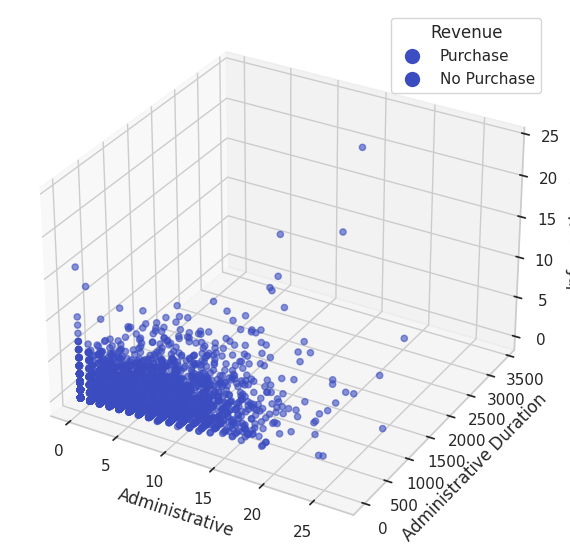

In [50]:
# Set up the figure and 3D axis
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Choose your variables for x, y, z, and hue
x = dfFinal['Administrative']
y = dfFinal['Administrative_Duration']
z = dfFinal['Informational']
hue = dfFinal['Revenue']

# Get colors from seaborn palette based on hue
palette = sns.color_palette("coolwarm", as_cmap=True)
colors = palette(hue.astype(int))

# Create 3D scatter plot
sc = ax.scatter(x, y, z, c=colors, alpha=0.6)

# Adding labels
ax.set_xlabel('Administrative')
ax.set_ylabel('Administrative Duration')
ax.set_zlabel('Informational')

# Create a legend
hue_legend_labels = [plt.Line2D([0], [0], marker='o', color=palette(1), linestyle='None', markersize=10, label='Purchase'),
                     plt.Line2D([0], [0], marker='o', color=palette(0), linestyle='None', markersize=10, label='No Purchase')]
ax.legend(handles=hue_legend_labels, title="Revenue")

# Show plot
plt.show()


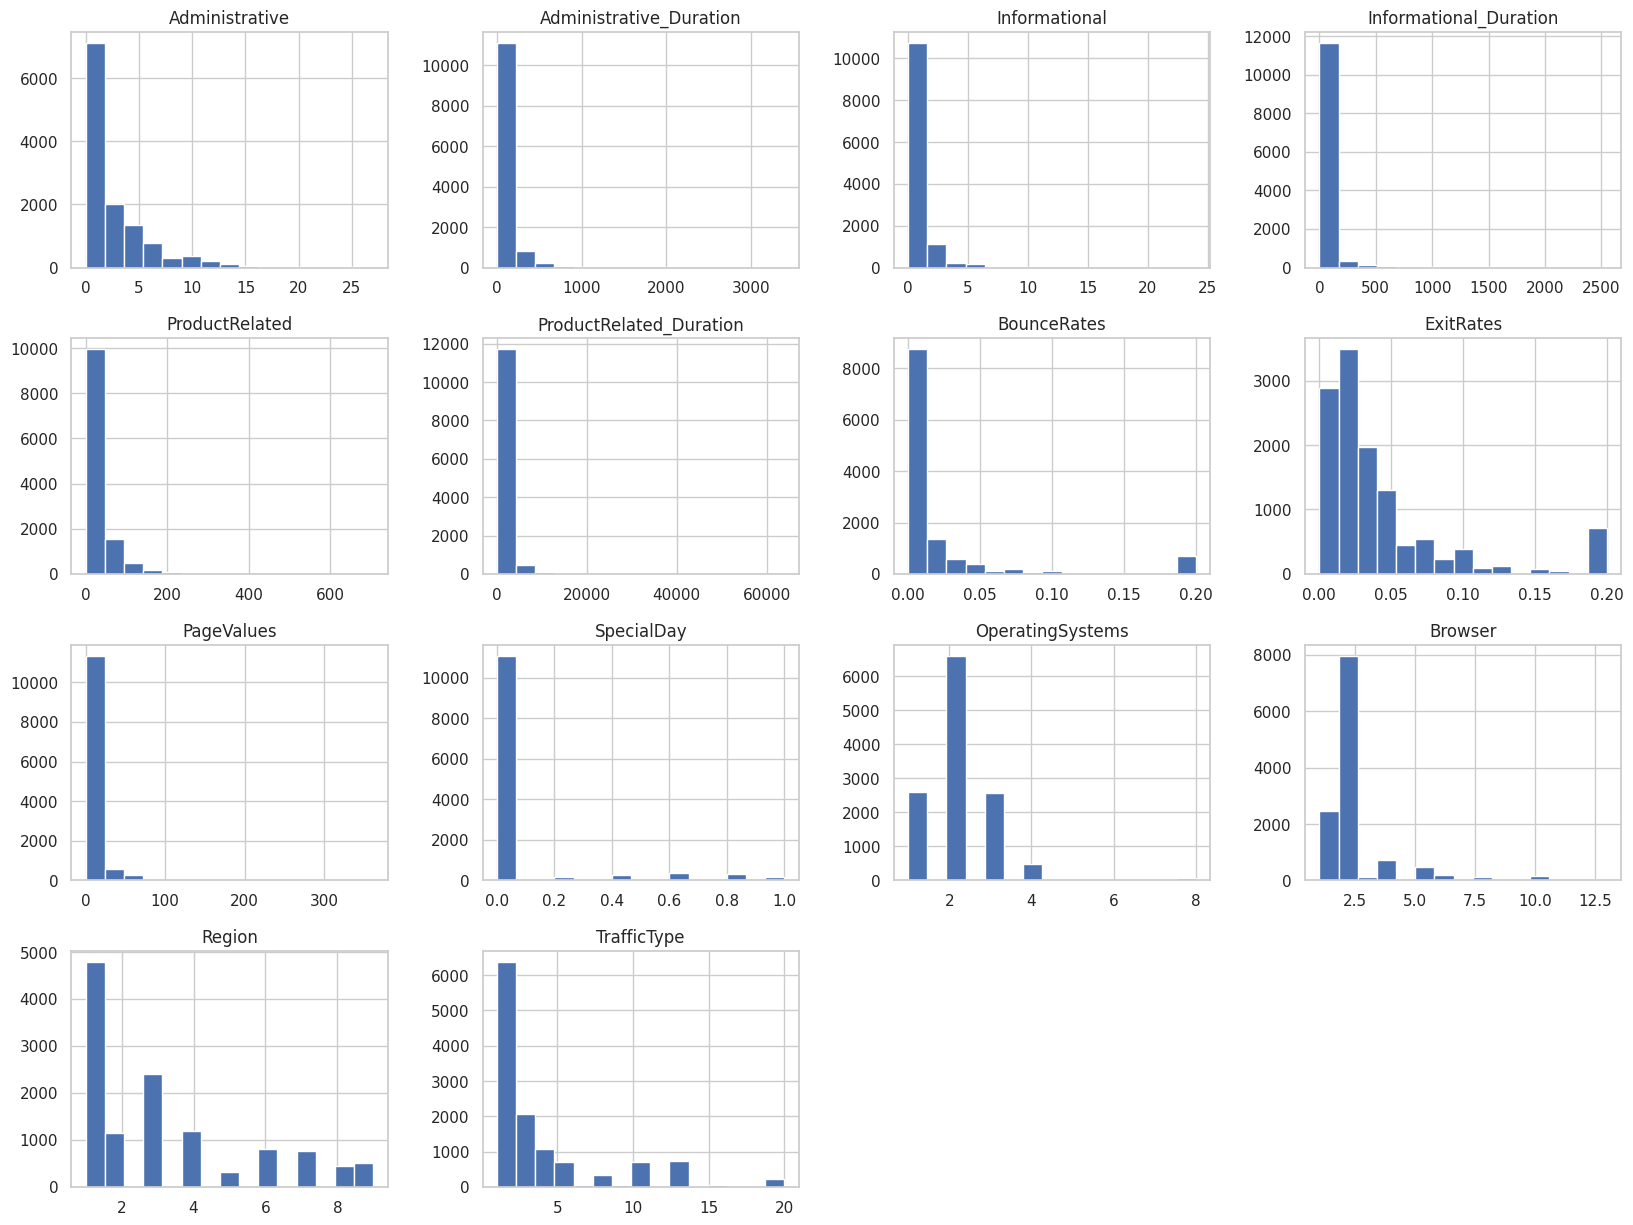

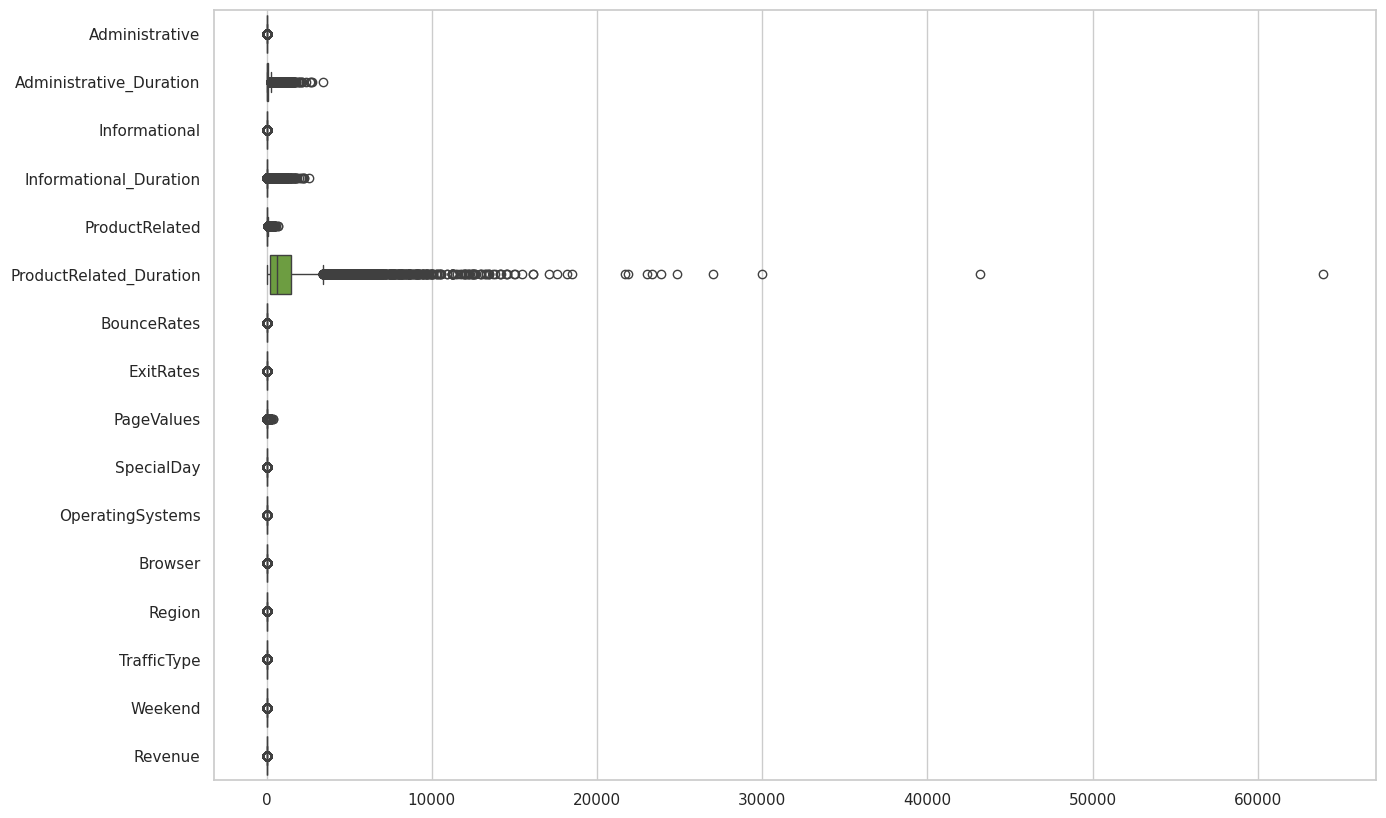

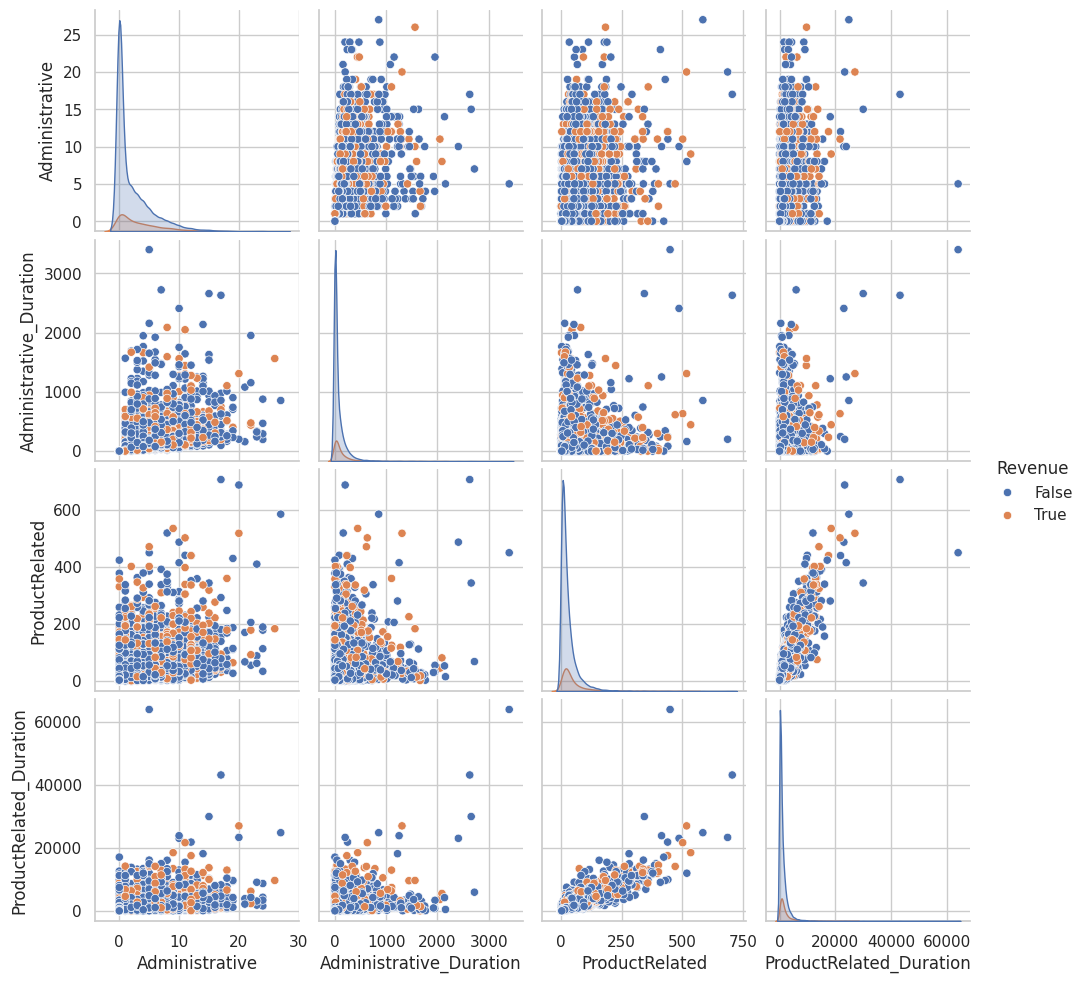

In [51]:
# Set up the plot aesthetics
sns.set(style="whitegrid")

# Plot histograms for all numerical variables
dfFinal.hist(bins=15, figsize=(20, 15))
plt.show()

# Boxplots to visualize the distribution and detect outliers
plt.figure(figsize=(15, 10))
sns.boxplot(data=dfFinal, orient="h")
plt.show()

# Pair plot for selected variables to observe pairwise relationships and distributions
sns.pairplot(dfFinal[['Administrative', 'Administrative_Duration', 'ProductRelated', 'ProductRelated_Duration', 'Revenue']], hue='Revenue')
plt.show()

### 1.3 Histograms for Numerical Variables:

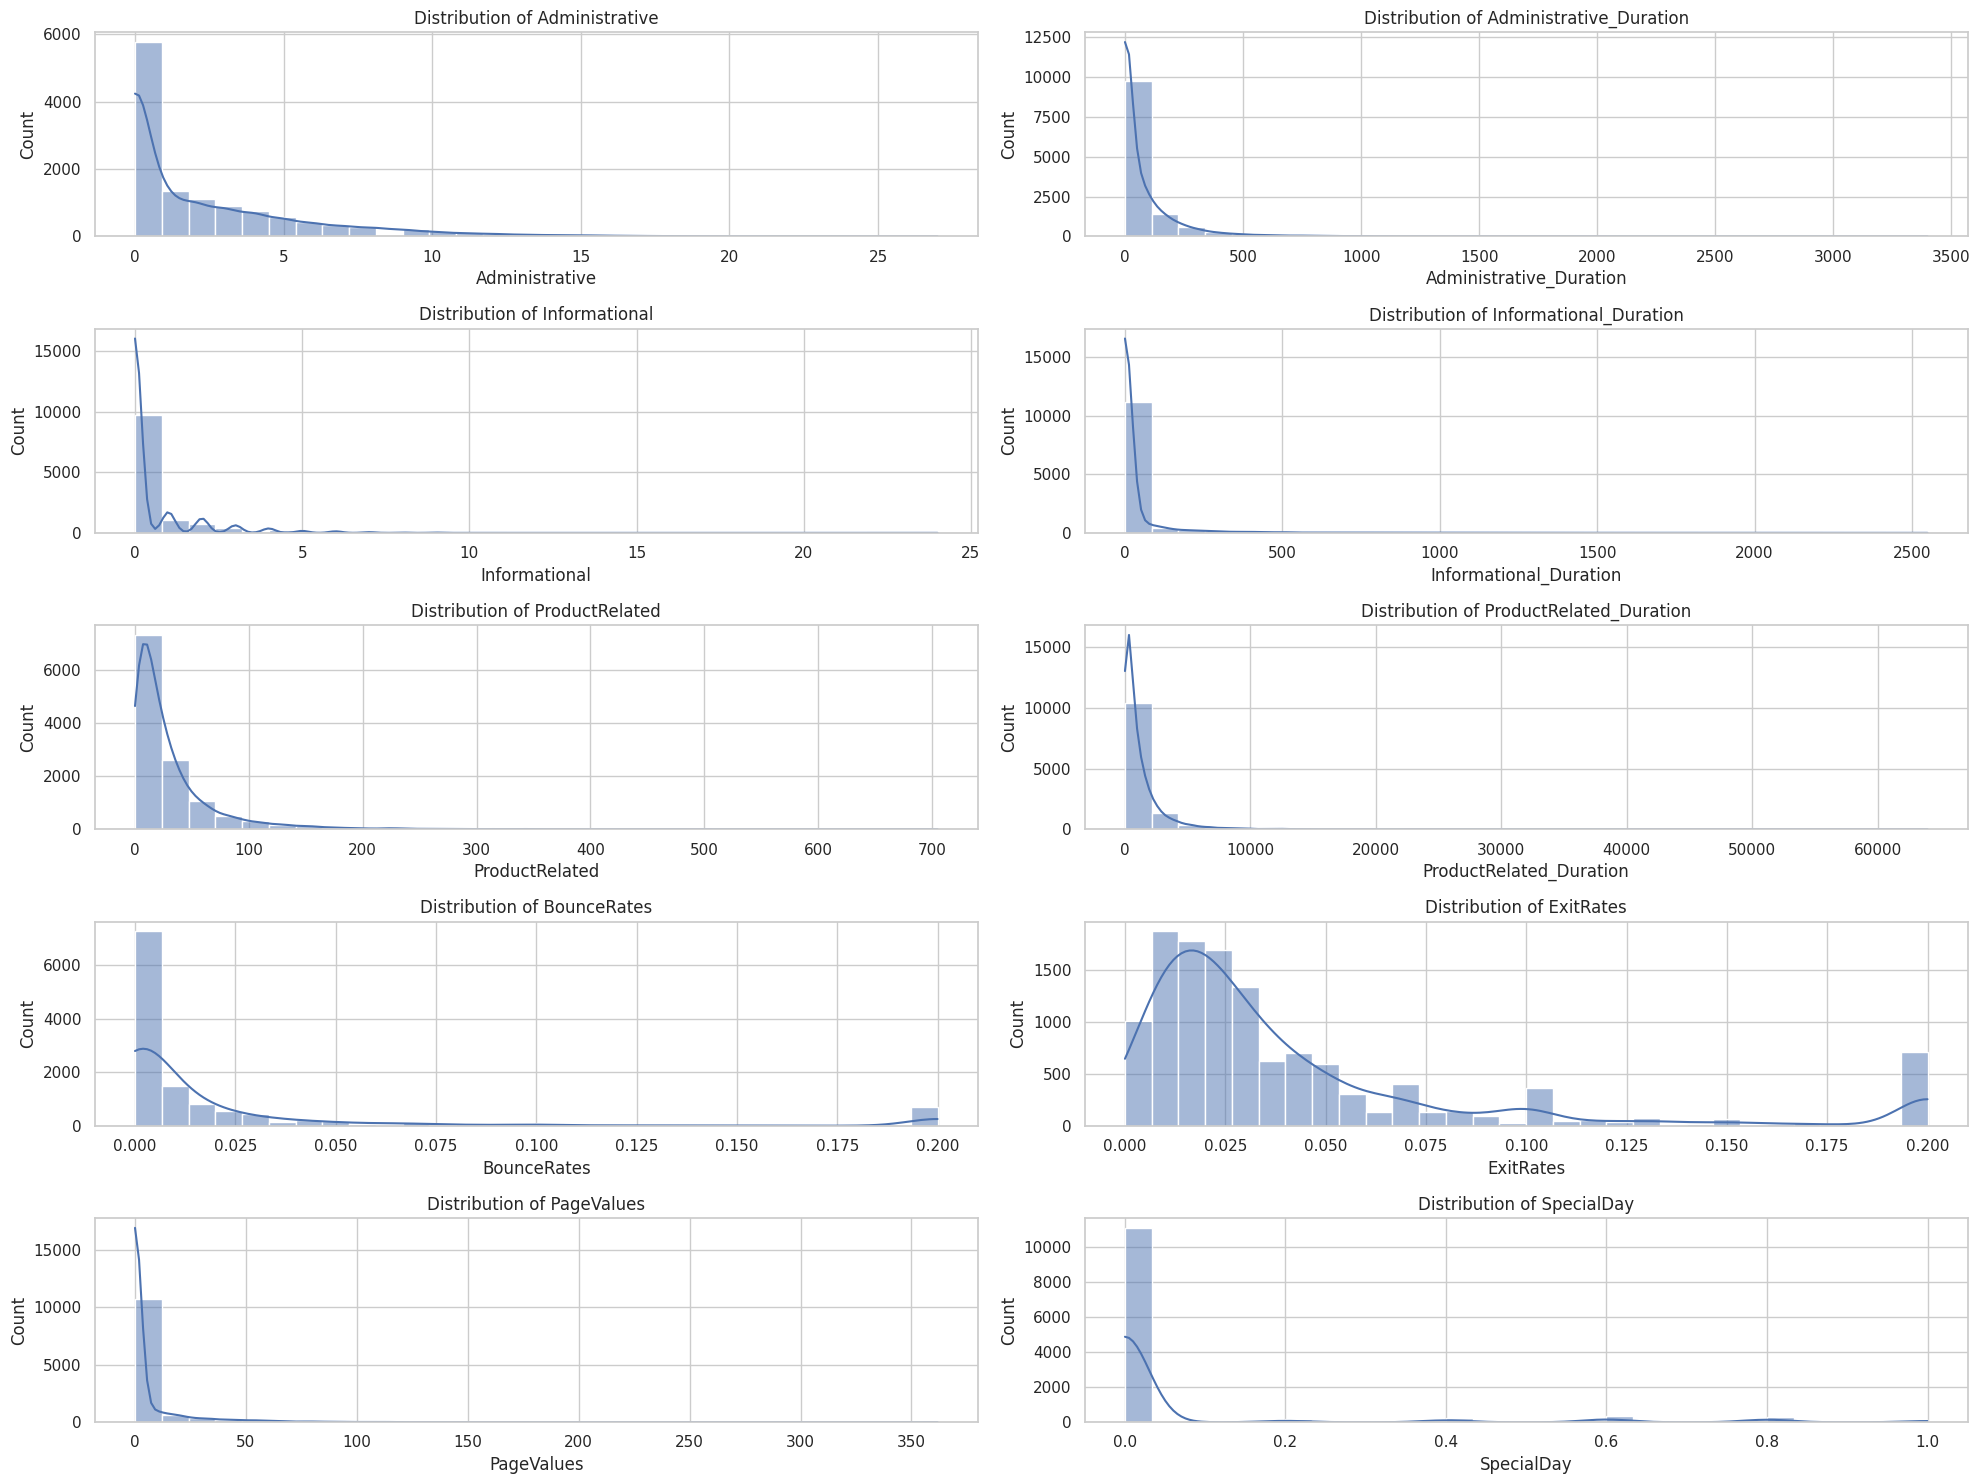

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of numerical columns to plot
numerical_columns = ['Administrative', 'Administrative_Duration', 'Informational',
                     'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
                     'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']

# Plot histograms for each numerical column
plt.figure(figsize=(20, 15))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(5, 2, i)  # Create a subplot for each variable
    sns.histplot(dfFinal[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


### 1.4 Box Plots for Numerical Variables

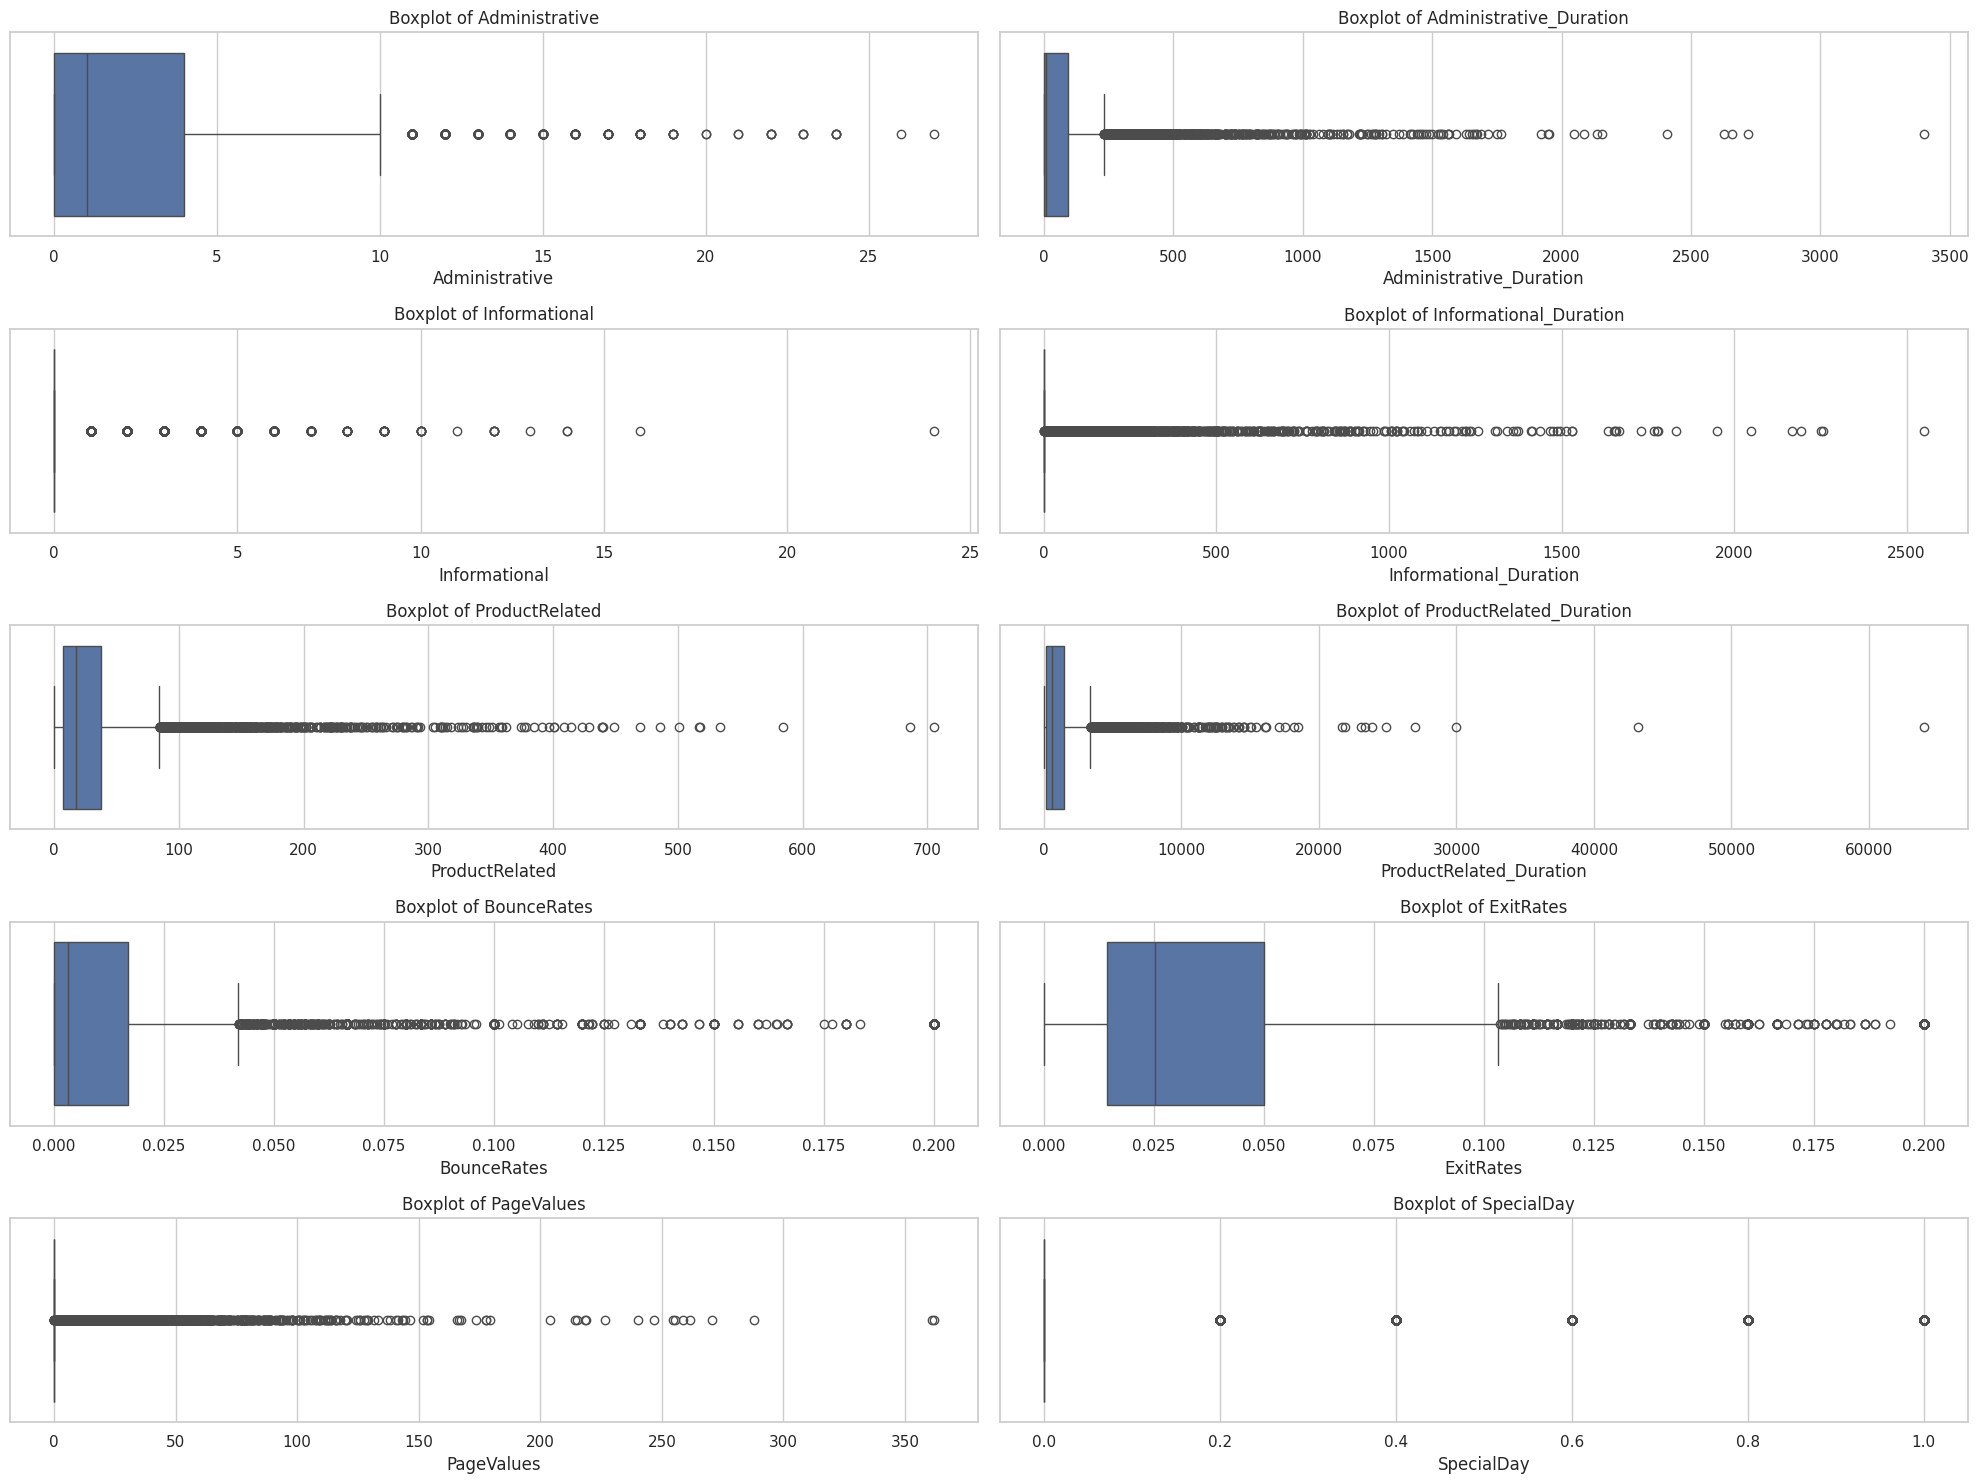

In [53]:
plt.figure(figsize=(20, 15))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(5, 2, i)
    sns.boxplot(x=dfFinal[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


### 1.5 Count Plots for Categorical Variables

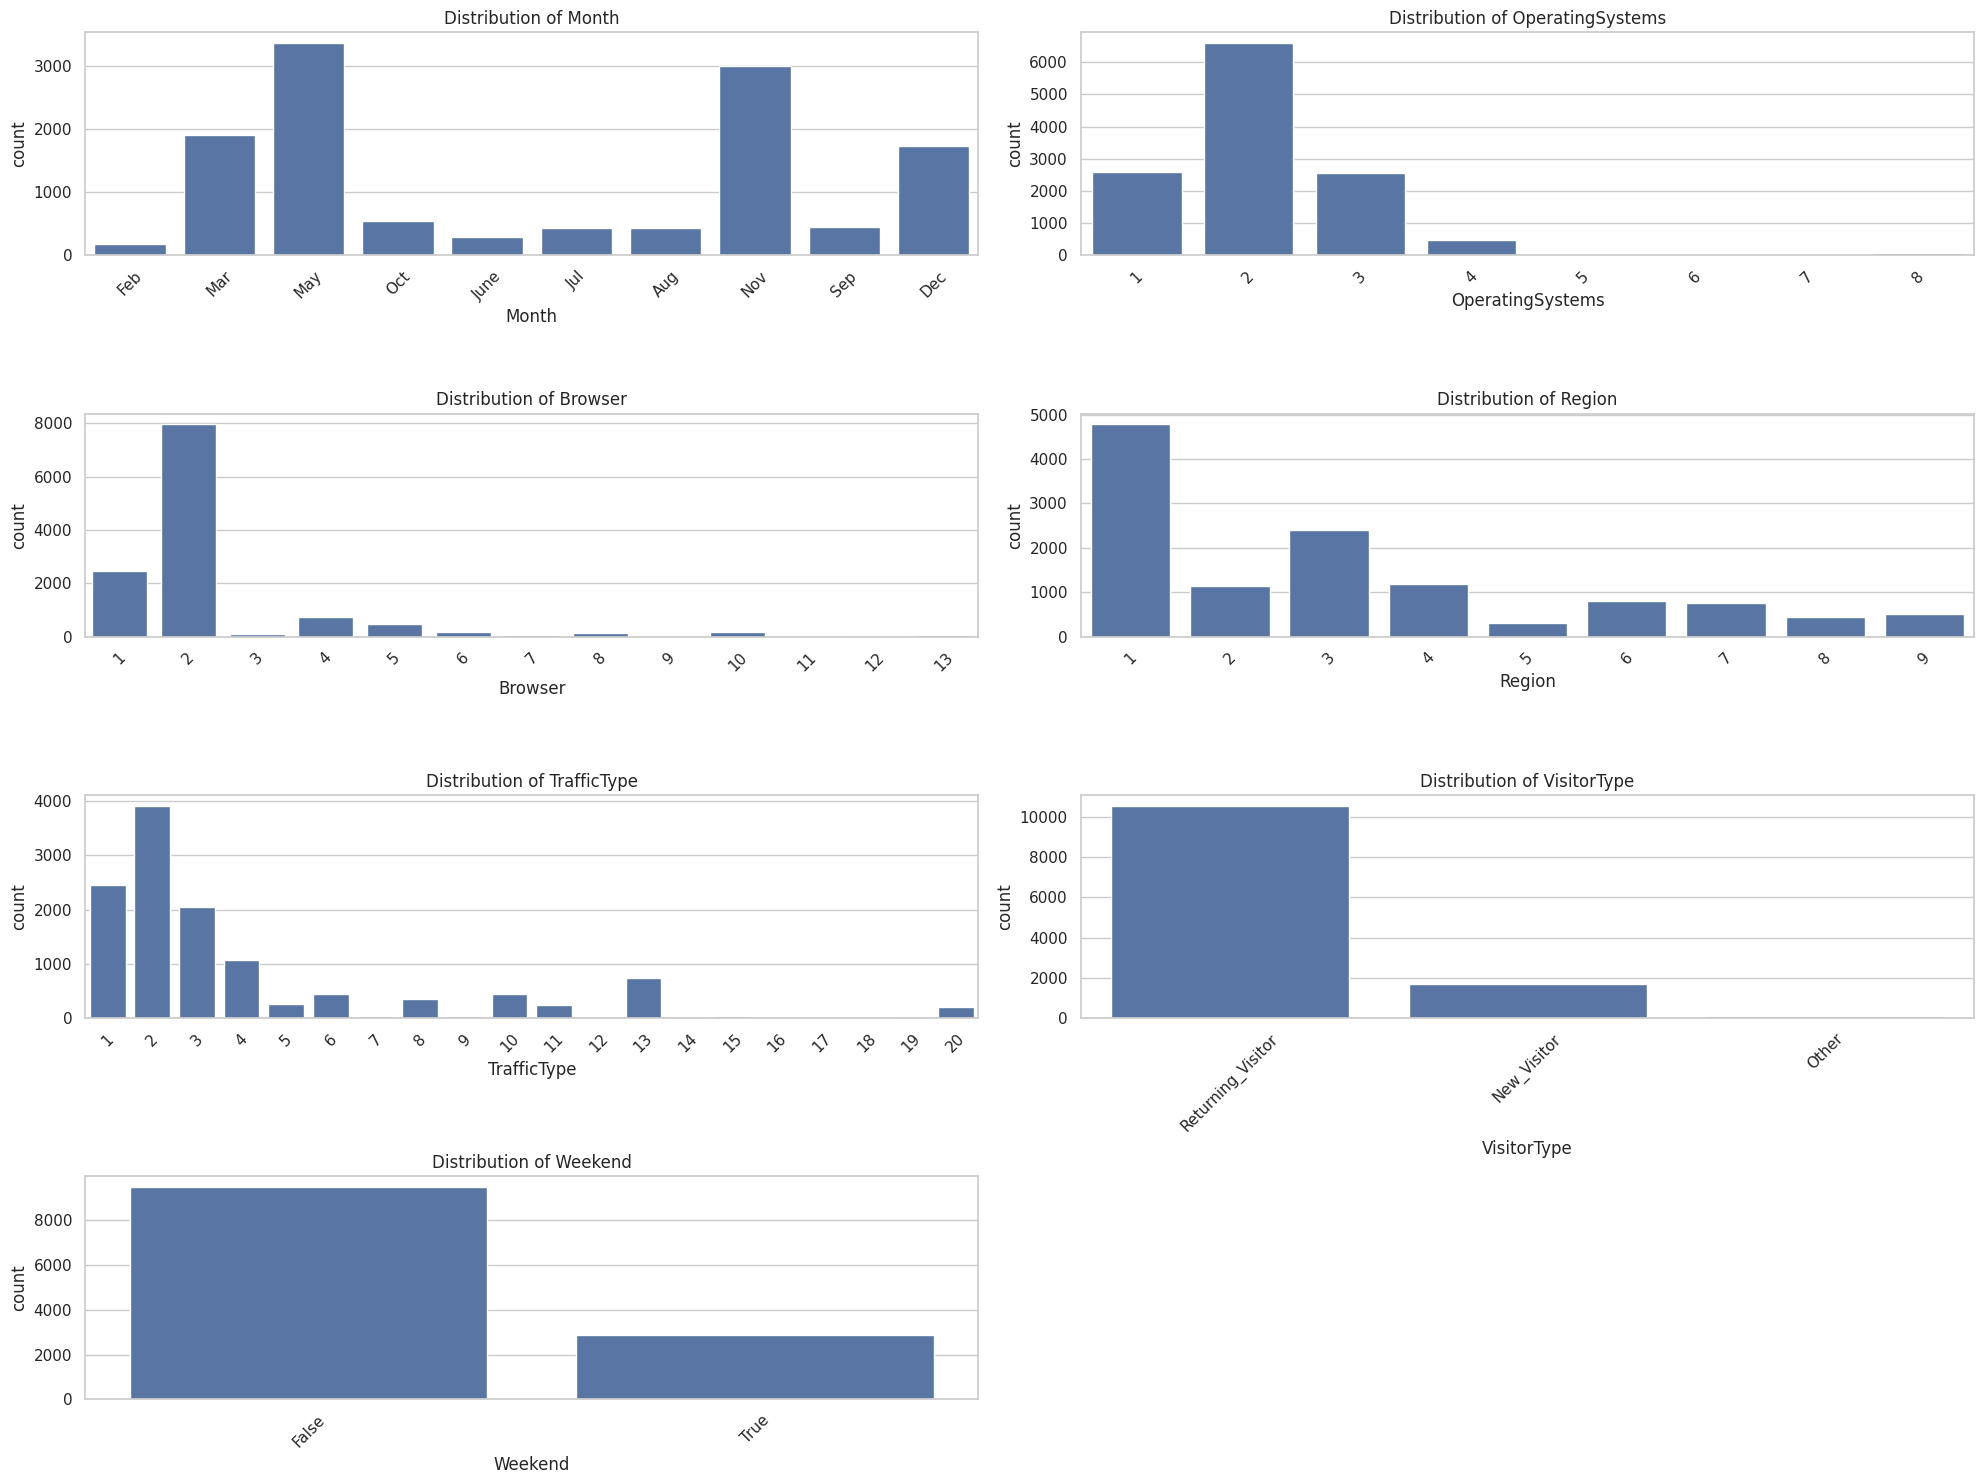

In [54]:
# List of categorical columns to plot
categorical_columns = ['Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend']

plt.figure(figsize=(20, 15))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(4, 2, i)
    sns.countplot(x=dfFinal[col])
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)  # Rotate x labels if necessary
plt.tight_layout()
plt.show()


### 1.6 Pair Plot for Selected Variables

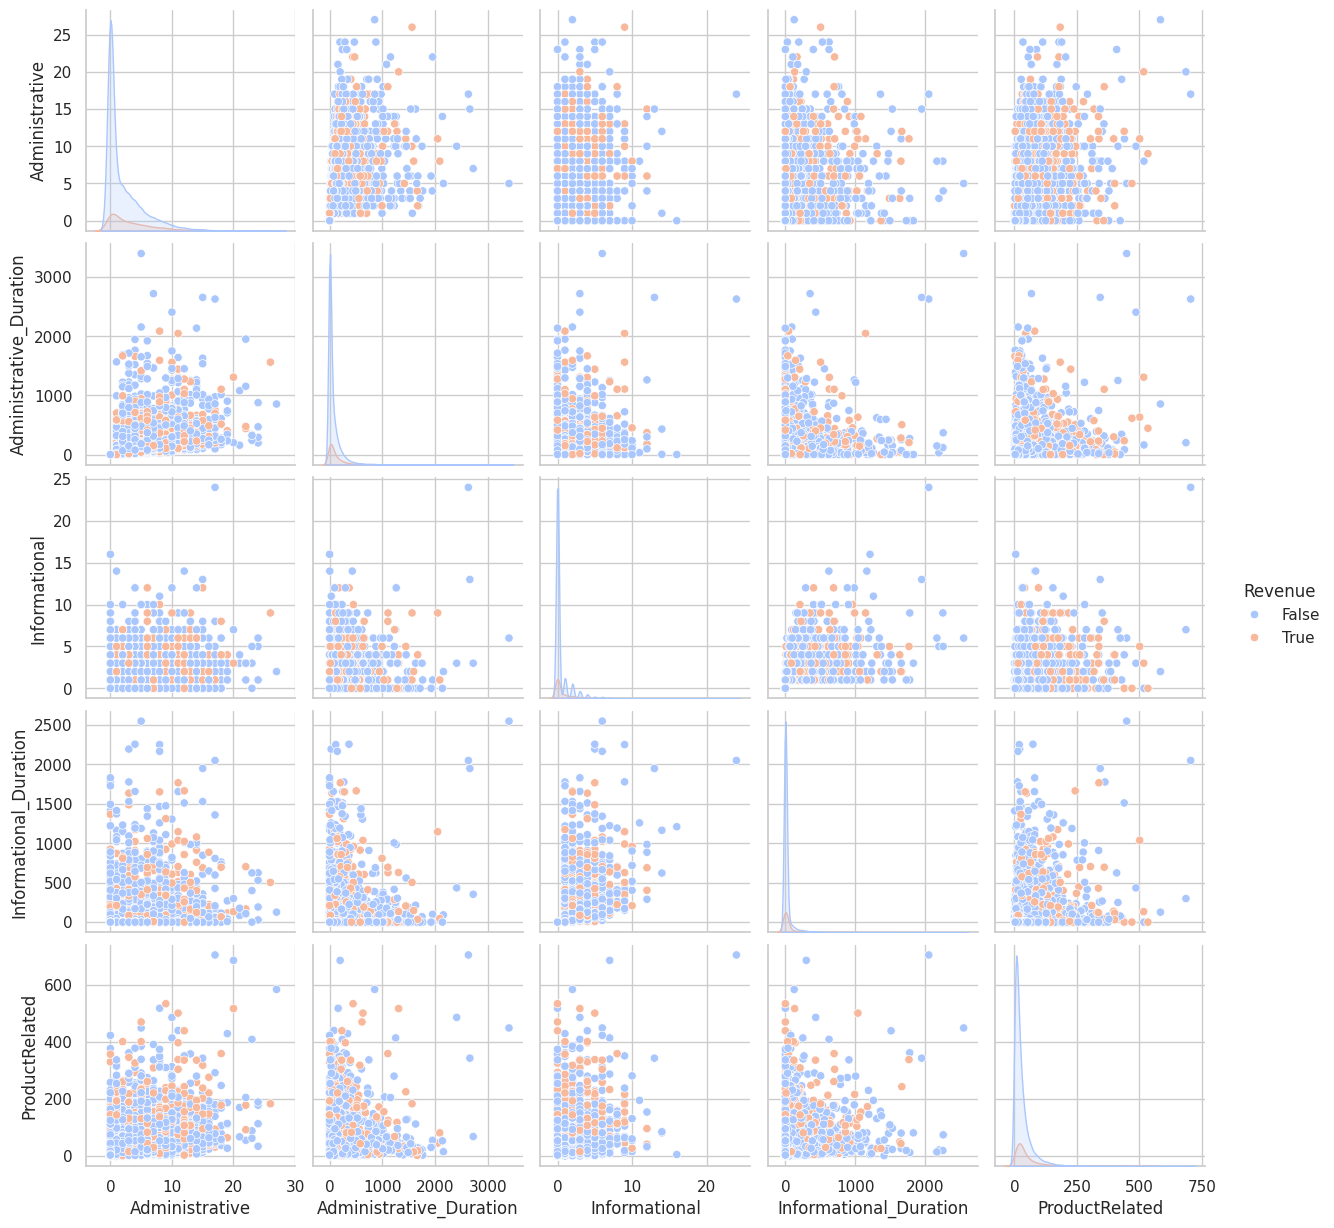

In [55]:
sns.pairplot(dfFinal, vars=numerical_columns[:5], hue='Revenue', palette='coolwarm')
plt.show()


### 1.7 Correlation

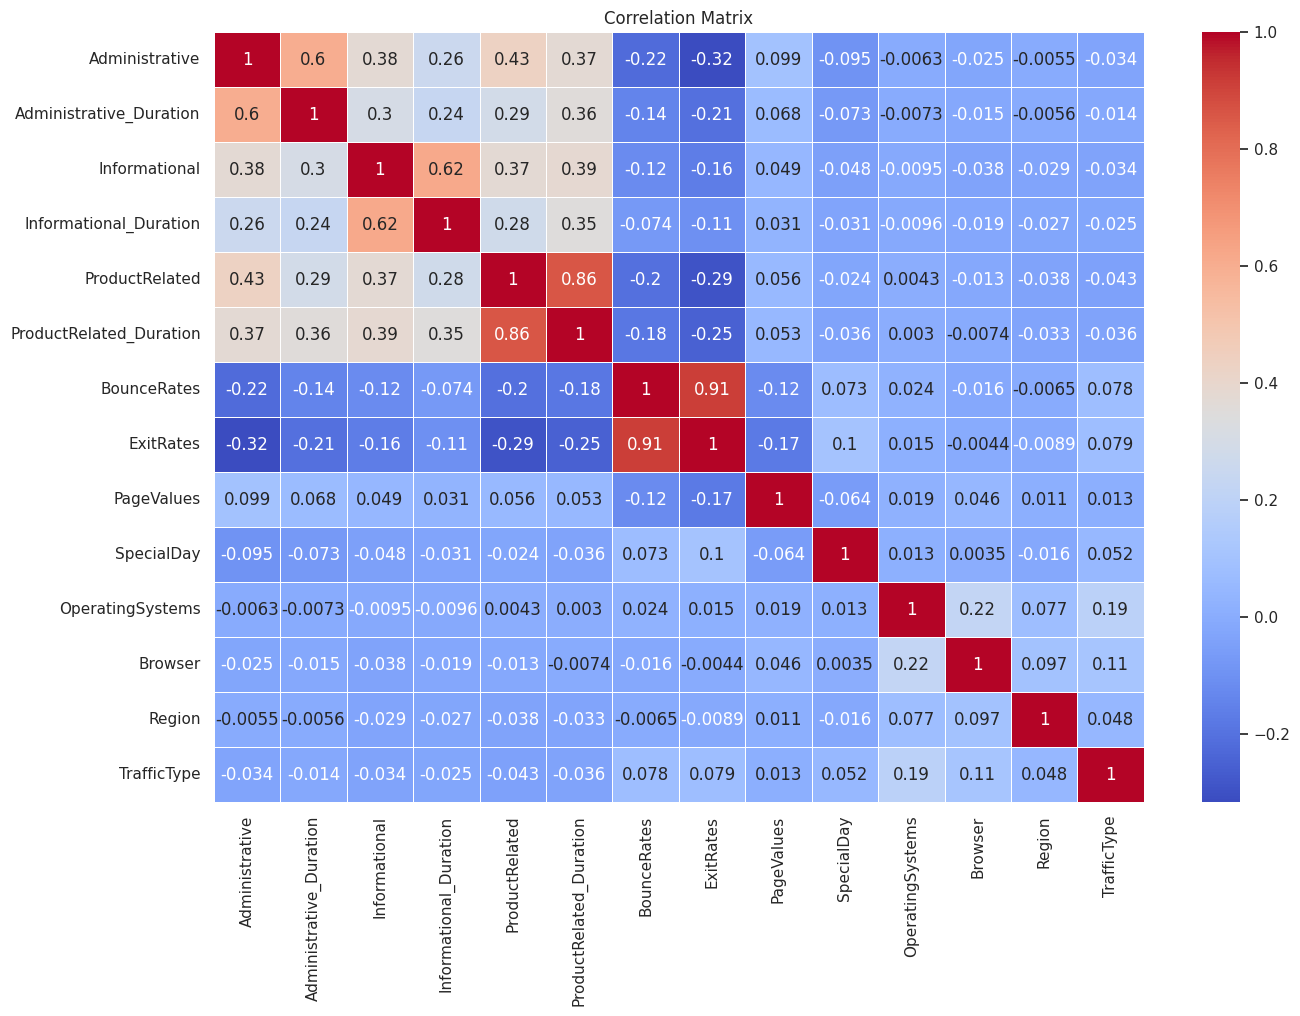

In [56]:
# Handle non-numerical columns before calculating correlation
dfFinal_numeric = dfFinal.select_dtypes(include=['number'])  # Select only numerical columns

# Compute the correlation matrix on numerical columns
correlation_matrix = dfFinal_numeric.corr()

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

### Insights

1. User Behavior and Engagement:
Administrative and Informational Interaction: Most users interact with only a small number of administrative or informational pages, as indicated by the skewed distributions of the Administrative, Administrative_Duration, Informational, and Informational_Duration variables. This suggests that users typically visit the site with specific intentions and don't spend much time navigating through these sections.
ProductRelated Pages: A significant portion of user engagement is centered around product-related pages (ProductRelated and ProductRelated_Duration). This aligns with the site's likely focus on e-commerce, where users are browsing products, and those who spend more time on these pages are more likely to make a purchase.
2. Purchase Behavior:
Revenue Association with Page Interactions: Users who make a purchase (Revenue=True) tend to have higher values for ProductRelated and ProductRelated_Duration. This suggests that a deeper engagement with product pages is a strong indicator of purchase intent.
Page Values and Transactions: The PageValues variable, which measures the average value of pages visited before a transaction, is skewed with a few high-value interactions. This indicates that while most users don’t visit high-value pages, those who do are more likely to complete a transaction.
3. Traffic and Visitor Type Insights:
New vs. Returning Visitors: The dataset contains information on whether visitors are new or returning (VisitorType). If a significant proportion of purchases are made by returning visitors, this might suggest that building customer loyalty or encouraging repeat visits could be key to increasing revenue.
Traffic Source Impact: TrafficType indicates the source of traffic to the website. Analyzing which sources lead to higher engagement or purchases can help in optimizing marketing efforts to target the most effective channels.
4. Temporal Insights:
Impact of Special Days: The SpecialDay variable indicates how close the visit was to a special day. If this variable has a strong correlation with Revenue, it might suggest that promotions or events on or around special days significantly drive sales.
Monthly Trends: The Month variable could reveal seasonal trends in user behavior and purchases. For example, higher activity in November and December could suggest increased shopping activity during the holiday season.
5. Bounce and Exit Rates:
Site Navigation and User Experience: High BounceRates and ExitRates might indicate issues with site navigation or user experience. If users are leaving the site from specific pages without further interaction, it might be worth investigating those pages to improve content or navigation, potentially leading to higher conversion rates.
6. Operating System and Browser Preferences:
User Demographics: The OperatingSystems and Browser variables provide insights into the technical preferences of the user base. This information can be useful for optimizing the website’s performance and design across different platforms to ensure a seamless user experience, which might in turn affect engagement and conversion rates.
Overall Strategic Insights:
Focus on Product Pages: Given that engagement with product pages is a strong predictor of purchases, enhancing the content, navigation, and user experience of these pages could lead to increased revenue.
Optimize for Returning Visitors: If returning visitors show a higher likelihood of purchase, targeted marketing campaigns and loyalty programs might be effective strategies.
Leverage Special Days: Special days can be capitalized on by running targeted promotions or discounts to boost sales.
Improve User Experience: Reducing bounce rates and optimizing exit pages can help retain visitors on the site longer, increasing the chance of conversion.

## 2- Data Preprocessing

### 2.1 Handling Missing Values

In [17]:
missing_values = dfFinal.isnull().sum()
print(missing_values)

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64


### 2.2 Encoding Categorical Variables

In [57]:
dfFinal_encoded = pd.get_dummies(dfFinal, columns=['Month', 'VisitorType', 'Weekend'], drop_first=True)

### 2.3 Normalization/Standardization of Numerical Features

In [58]:
from sklearn.preprocessing import StandardScaler

# List of numerical features to standardize
numerical_features = ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration',
                      'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']

# Standardizing the features
scaler = StandardScaler()
dfFinal_encoded[numerical_features] = scaler.fit_transform(dfFinal_encoded[numerical_features])

# Check the result of standardization
print(dfFinal_encoded.head())


   Administrative  Administrative_Duration  Informational  \
0       -0.696993                -0.457191      -0.396478   
1       -0.696993                -0.457191      -0.396478   
2       -0.696993                -0.457191      -0.396478   
3       -0.696993                -0.457191      -0.396478   
4       -0.696993                -0.457191      -0.396478   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0               -0.244931       -0.691003                -0.624348   
1               -0.244931       -0.668518                -0.590903   
2               -0.244931       -0.691003                -0.624348   
3               -0.244931       -0.668518                -0.622954   
4               -0.244931       -0.488636                -0.296430   

   BounceRates  ExitRates  PageValues  SpecialDay  ...  Month_Jul  Month_June  \
0     3.667189   3.229316   -0.317178   -0.308821  ...      False       False   
1    -0.457683   1.171473   -0.317178   -0.308821 

## 3- Feature Engineering

### 3.1 Creating New Features Based on Existing Data

**Average Time per Page**: For each category (Administrative, Informational, ProductRelated), calculate the average time spent per page.

**Total Duration**: Calculate the total time spent on the site by summing the durations of all categories.

**Page Interaction Ratios**: Create ratios like ProductRelated to Total Pages Visited to see the proportion of interactions that are product-related.

In [21]:
# Creating new feature: Average time per page for each category
dfFinal_encoded['Avg_Administrative_Duration'] = dfFinal_encoded['Administrative_Duration'] / (dfFinal_encoded['Administrative'] + 1)
dfFinal_encoded['Avg_Informational_Duration'] = dfFinal_encoded['Informational_Duration'] / (dfFinal_encoded['Informational'] + 1)
dfFinal_encoded['Avg_ProductRelated_Duration'] = dfFinal_encoded['ProductRelated_Duration'] / (dfFinal_encoded['ProductRelated'] + 1)

# Creating new feature: Total duration spent on the site
dfFinal_encoded['Total_Duration'] = (dfFinal_encoded['Administrative_Duration'] +
                                      dfFinal_encoded['Informational_Duration'] +
                                      dfFinal_encoded['ProductRelated_Duration'])

# Creating new feature: Ratio of product-related interactions to total interactions
dfFinal_encoded['ProductRelated_Ratio'] = dfFinal_encoded['ProductRelated'] / (dfFinal_encoded['Administrative'] + dfFinal_encoded['Informational'] + dfFinal_encoded['ProductRelated'] + 1)

# Check the new features
print(dfFinal_encoded[['Avg_Administrative_Duration', 'Avg_Informational_Duration', 'Avg_ProductRelated_Duration', 'Total_Duration', 'ProductRelated_Ratio']].head())


   Avg_Administrative_Duration  Avg_Informational_Duration  \
0                    -1.508847                   -0.405835   
1                    -1.508847                   -0.405835   
2                    -1.508847                   -0.405835   
3                    -1.508847                   -0.405835   
4                    -1.508847                   -0.405835   

   Avg_ProductRelated_Duration  Total_Duration  ProductRelated_Ratio  
0                    -2.020563       -1.326469              0.880849  
1                    -1.782608       -1.293024              0.877333  
2                    -2.020563       -1.326469              0.880849  
3                    -1.879299       -1.325076              0.877333  
4                    -0.579686       -0.998552              0.839427  


### 3.2 Selecting Important Features

Revenue                          1.000000
PageValues                       0.492569
Avg_ProductRelated_Duration      0.203102
ProductRelated                   0.158538
Month_Nov                        0.154774
ProductRelated_Duration          0.152373
Avg_Administrative_Duration      0.146407
Total_Duration                   0.143160
Administrative                   0.138917
Informational                    0.095200
Administrative_Duration          0.093587
Avg_Informational_Duration       0.082824
Informational_Duration           0.070345
Month_Oct                        0.032666
Weekend_True                     0.029295
Browser                          0.023984
Month_Sep                        0.019983
VisitorType_Other                0.007715
Month_Jul                       -0.001036
TrafficType                     -0.005113
Region                          -0.011595
ProductRelated_Ratio            -0.011720
OperatingSystems                -0.014668
Month_June                      -0

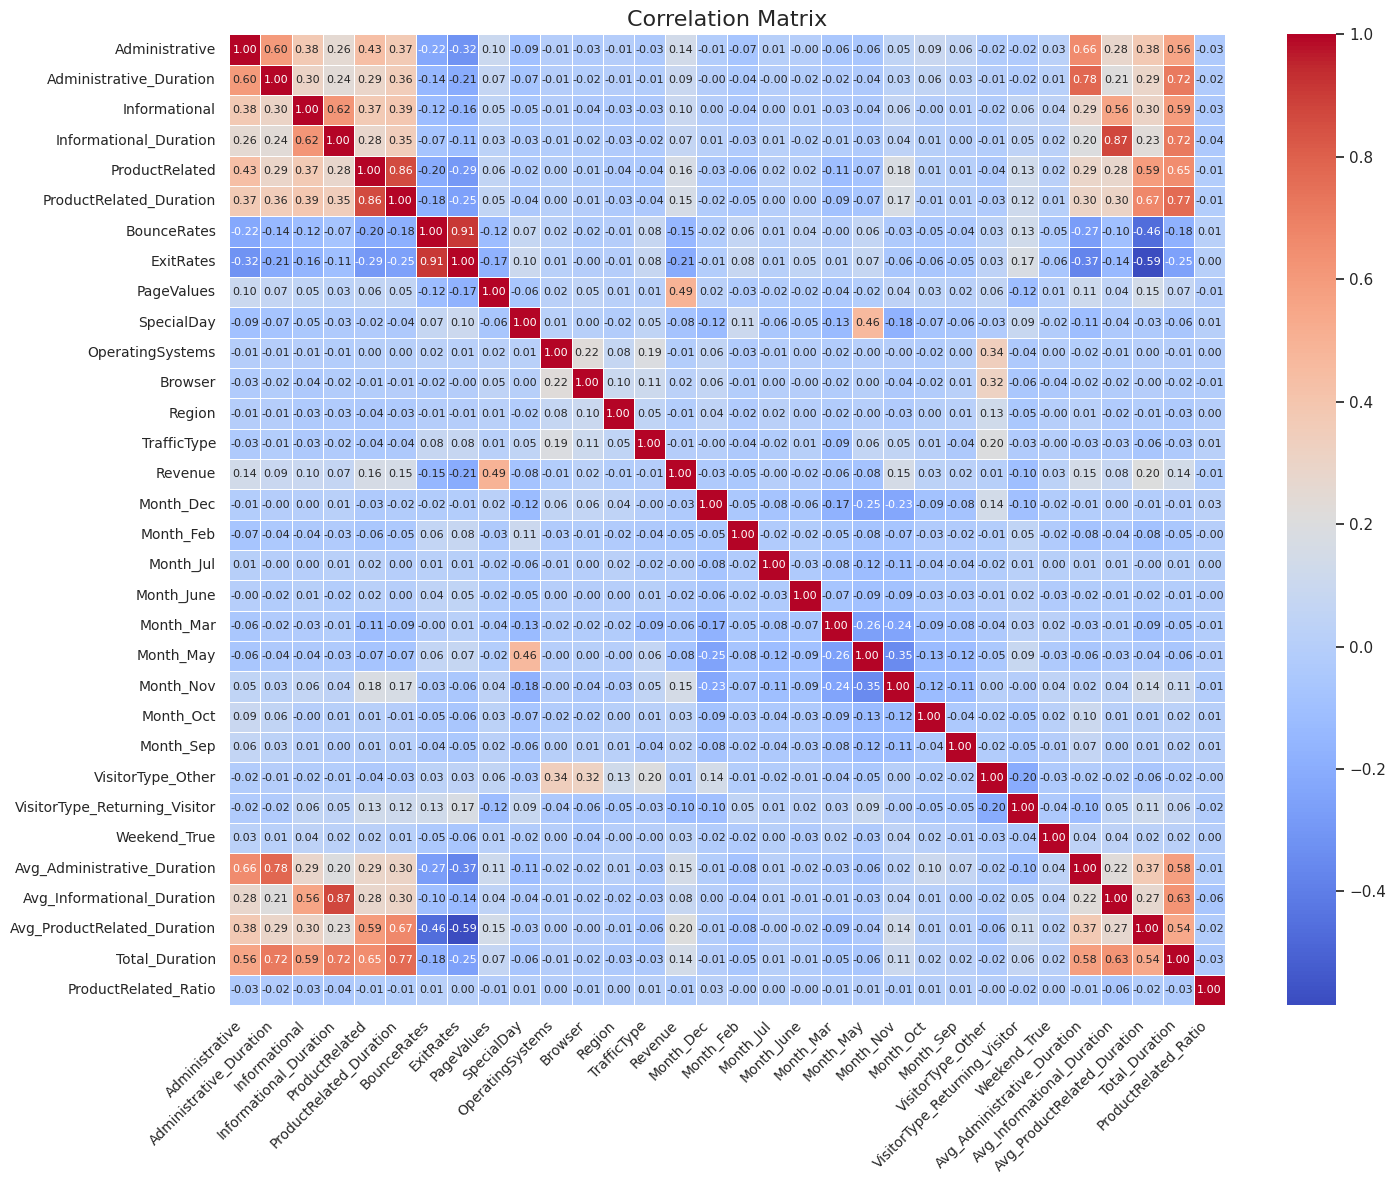

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix with the target variable included
corr_matrix = dfFinal_encoded.corr()

# Display the correlation of features with the target variable
corr_with_target = corr_matrix['Revenue'].sort_values(ascending=False)
print(corr_with_target)

# Visualizing the correlation matrix with improved readability
plt.figure(figsize=(15, 12))  # Increase the size of the figure
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, annot_kws={"size": 8})
plt.title("Correlation Matrix", fontsize=16)

# Rotate the x and y axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)

# Adjust layout to ensure everything fits without overlapping
plt.tight_layout()

plt.show()


### 3.3 Feature Importance from Random Forest

                    Feature  Importance
8                PageValues    0.364690
7                 ExitRates    0.091463
5   ProductRelated_Duration    0.089094
4            ProductRelated    0.072797
1   Administrative_Duration    0.058152
6               BounceRates    0.057006
0            Administrative    0.042631
13              TrafficType    0.031679
12                   Region    0.031215
3    Informational_Duration    0.026131


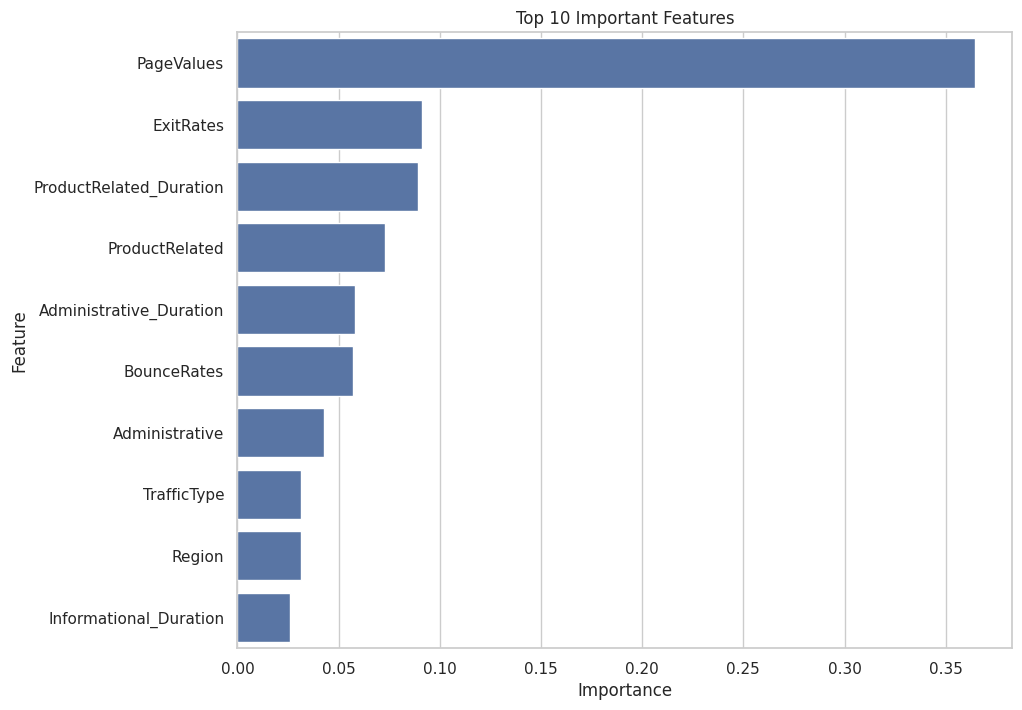

In [27]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Train a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importances from the model
feature_importances = rf_model.feature_importances_
features = X_train.columns

# Create a DataFrame to visualize the importance of each feature
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the top 10 important features
print(importance_df.head(10))

# Plotting the feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(10))
plt.title('Top 10 Important Features')
plt.show()

### Key Insights from the Feature Importance Chart:
PageValues:
This feature has the highest importance by a significant margin, indicating that it is the most influential feature in predicting whether a visitor will make a purchase.
Interpretation: PageValues represent the average value of pages visited before completing a transaction, suggesting that pages with higher values are strongly associated with completed purchases.

ExitRates:
This feature also has considerable importance, implying that the rate at which visitors exit the site after viewing a page is crucial in determining their likelihood to make a purchase.
Interpretation: High exit rates may indicate a lack of engagement or satisfaction, which negatively impacts the likelihood of a purchase.

ProductRelated_Duration and ProductRelated:
These two features are closely related and significant, showing that both the number of product-related pages visited and the duration spent on them are important predictors of purchasing behavior.
Interpretation: Visitors who spend more time and view more product-related pages are more likely to make a purchase.

Administrative_Duration and Administrative:
These features have a moderate level of importance, indicating that interaction with administrative pages (e.g., account management) also plays a role in purchase decisions.
Interpretation: While less important than product interactions, administrative activities may still indicate serious purchase intent.

BounceRates:
This feature measures how often visitors leave the site after viewing just one page, and it is an important factor in determining purchase likelihood.
Interpretation: Higher bounce rates typically suggest a poor user experience or a mismatch between visitor expectations and site content, leading to lower conversion rates.

TrafficType:
The source of traffic also plays a role in predicting purchases, suggesting that some traffic sources are more likely to convert than others.
Interpretation: Understanding which traffic types are most effective can help optimize marketing and acquisition strategies.

Region:
The geographical region of the visitor has some importance, indicating that location-based factors might influence purchasing behavior.
Interpretation: Certain regions may have higher or lower conversion rates, possibly due to cultural, economic, or logistical reasons.

Informational_Duration:
This feature has the least importance among the top 10, suggesting that time spent on informational pages is less predictive of purchasing behavior compared to other features.
Interpretation: While still relevant, visitors may not need to spend much time on informational pages to make a purchase decision.

## 4- Model Building and Optimization

### 4.1 Split the dataset into training and testing sets.

In [20]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target (y)
X = dfFinal_encoded.drop('Revenue', axis=1)
y = dfFinal_encoded['Revenue']

# Split the data into training and testing sets (e.g., 80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Check the shape of the training and testing data
print(f"Training data shape: X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Testing data shape: X_test: {X_test.shape}, y_test: {y_test.shape}")


Training data shape: X_train: (9864, 26), y_train: (9864,)
Testing data shape: X_test: (2466, 26), y_test: (2466,)


### 4.2 Import Required Libraries

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix


### 4.3 Prepare the Data

In [ ]:
# Standardize the data for models like Logistic Regression and SVM
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### 4.4 Train and Evaluate Models

### 4.5 Models

### 4.5.1 Logistic Regression

Logistic Regression Performance (Before Optimization):
Accuracy: 0.8812
Precision: 0.7432
Recall: 0.3560
F1 Score: 0.4814
ROC AUC Score: 0.6667


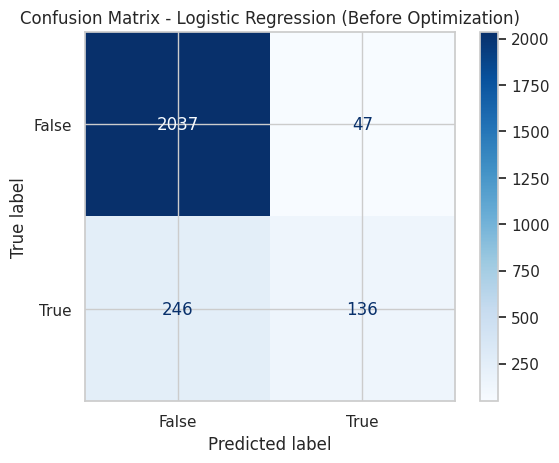

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 


Best Hyperparameters for Logistic Regression: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}

Logistic Regression Performance (After Optimization):
Accuracy: 0.8812
Precision: 0.7432
Recall: 0.3560
F1 Score: 0.4814
ROC AUC Score: 0.6667


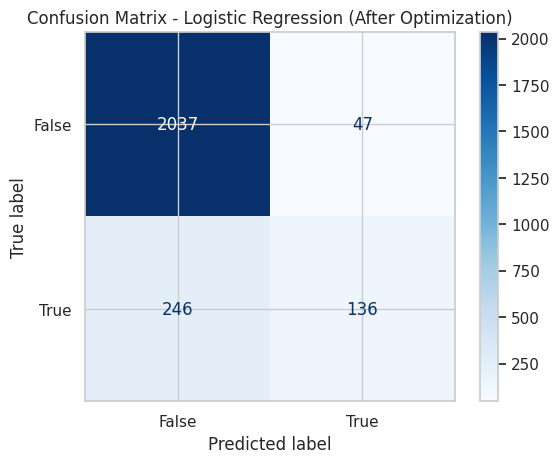

In [61]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

# -----------------------------------------
# Before Model Optimization
# -----------------------------------------

# Train Logistic Regression model with default hyperparameters
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

# Predict and evaluate
y_pred_log_reg = log_reg.predict(X_test)

print("Logistic Regression Performance (Before Optimization):")
print(f"Accuracy: {accuracy_score(y_test, y_pred_log_reg):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_log_reg):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_log_reg):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_log_reg):.4f}")
print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred_log_reg):.4f}")

# Generate confusion matrix
cm_before = confusion_matrix(y_test, y_pred_log_reg)

# Display the confusion matrix
disp_before = ConfusionMatrixDisplay(confusion_matrix=cm_before, display_labels=log_reg.classes_)
disp_before.plot(cmap='Blues')

# Show the plot
plt.title("Confusion Matrix - Logistic Regression (Before Optimization)")
plt.show()

# -----------------------------------------
# Model Optimization
# -----------------------------------------

# Define the hyperparameters grid for GridSearchCV
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l2'],  # Use 'l2' penalty
    'solver': ['lbfgs', 'liblinear', 'saga']  # Appropriate solvers
}

# Perform GridSearch with cross-validation
grid_search_log_reg = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy')
grid_search_log_reg.fit(X_train, y_train)

# Get the best model and parameters
best_log_reg = grid_search_log_reg.best_estimator_
print("\nBest Hyperparameters for Logistic Regression:", grid_search_log_reg.best_params_)

# -----------------------------------------
# After Model Optimization
# -----------------------------------------

# Predict and evaluate using the best model
y_pred_log_reg_best = best_log_reg.predict(X_test)

print("\nLogistic Regression Performance (After Optimization):")
print(f"Accuracy: {accuracy_score(y_test, y_pred_log_reg_best):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_log_reg_best):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_log_reg_best):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_log_reg_best):.4f}")
print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred_log_reg_best):.4f}")

# Generate confusion matrix
cm_after = confusion_matrix(y_test, y_pred_log_reg_best)

# Display the confusion matrix
disp_after = ConfusionMatrixDisplay(confusion_matrix=cm_after, display_labels=best_log_reg.classes_)
disp_after.plot(cmap='Blues')

# Show the plot
plt.title("Confusion Matrix - Logistic Regression (After Optimization)")
plt.show()


The lack of improvement after optimization is a valuable insight itself. It suggests that the default Logistic Regression model is already performing at its best for this dataset, or that more fundamental changes in model choice, feature engineering, or data preprocessing might be needed to see further improvements.



### 4.5.2 Decision Tree


Decision Tree Performance:
Accuracy: 0.8609
Precision: 0.5504
Recall: 0.5576
F1 Score: 0.5540
ROC AUC Score: 0.7370


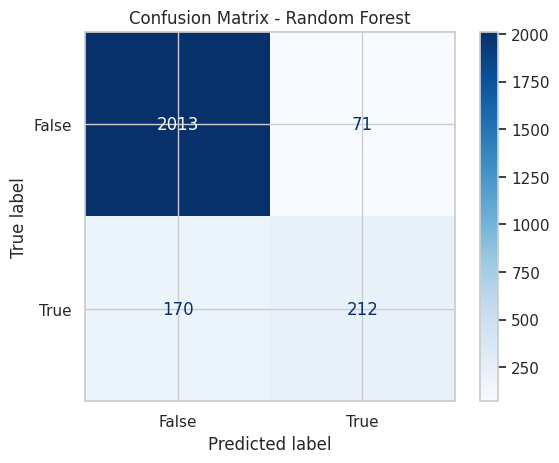

In [40]:
# Train Decision Tree model
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)

# Predict and evaluate
y_pred_dtree = dtree.predict(X_test)
print("\nDecision Tree Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_dtree):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_dtree):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_dtree):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_dtree):.4f}")
print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred_dtree):.4f}")

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict the test set
y_pred_rf = rf.predict(X_test)

# Generate the confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Display the confusion matrix
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=rf.classes_)
disp_rf.plot(cmap='Blues')

# Show the plot
plt.title("Confusion Matrix - Random Forest")
plt.show()


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

# -----------------------------------------
# Before Model Optimization
# -----------------------------------------

# Train Decision Tree model with default hyperparameters
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)

# Predict and evaluate
y_pred_dtree = dtree.predict(X_test)
print("\nDecision Tree Performance (Before Optimization):")
print(f"Accuracy: {accuracy_score(y_test, y_pred_dtree):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_dtree):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_dtree):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_dtree):.4f}")
print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred_dtree):.4f}")

# Generate the confusion matrix
cm_before = confusion_matrix(y_test, y_pred_dtree)

# Display the confusion matrix
disp_before = ConfusionMatrixDisplay(confusion_matrix=cm_before, display_labels=dtree.classes_)
disp_before.plot(cmap='Blues')

# Show the plot
plt.title("Confusion Matrix - Decision Tree (Before Optimization)")
plt.show()

# -----------------------------------------
# Model Optimization
# -----------------------------------------

# Define the hyperparameters grid for GridSearchCV
param_grid = {
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Perform GridSearch with cross-validation
grid_search_dtree = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search_dtree.fit(X_train, y_train)

# Get the best model and parameters
best_dtree = grid_search_dtree.best_estimator_
print("\nBest Hyperparameters for Decision Tree:", grid_search_dtree.best_params_)

# -----------------------------------------
# After Model Optimization
# -----------------------------------------

# Predict and evaluate using the best model
y_pred_dtree_best = best_dtree.predict(X_test)
print("\nDecision Tree Performance (After Optimization):")
print(f"Accuracy: {accuracy_score(y_test, y_pred_dtree_best):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_dtree_best):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_dtree_best):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_dtree_best):.4f}")
print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred_dtree_best):.4f}")

# Generate the confusion matrix
cm_after = confusion_matrix(y_test, y_pred_dtree_best)

# Display the confusion matrix
disp_after = ConfusionMatrixDisplay(confusion_matrix=cm_after, display_labels=best_dtree.classes_)
disp_after.plot(cmap='Blues')

# Show the plot
plt.title("Confusion Matrix - Decision Tree (After Optimization)")
plt.show()


### 4.5.3 Random Forest

Random Forest Performance (Before Optimization):
Accuracy: 0.9023
Precision: 0.7491
Recall: 0.5550
F1 Score: 0.6376
ROC AUC Score: 0.7605


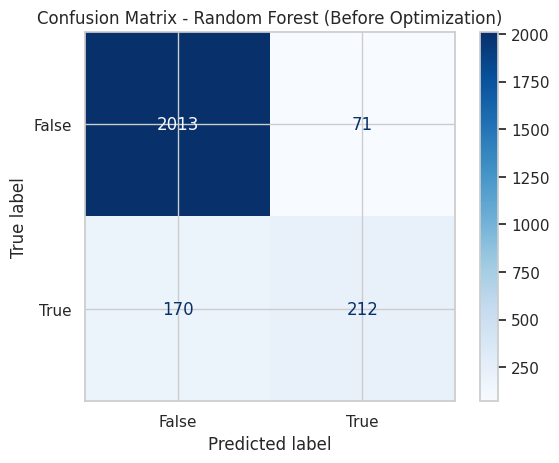

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

# -----------------------------------------
# Before Model Optimization
# -----------------------------------------

# Train Random Forest model with default hyperparameters
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_rf = rf_model.predict(X_test)

# Print performance metrics
print("Random Forest Performance (Before Optimization):")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_rf):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_rf):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_rf):.4f}")
print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred_rf):.4f}")

# Generate the confusion matrix
cm_rf_before = confusion_matrix(y_test, y_pred_rf)

# Display the confusion matrix
disp_rf_before = ConfusionMatrixDisplay(confusion_matrix=cm_rf_before, display_labels=rf_model.classes_)
disp_rf_before.plot(cmap='Blues')

# Show the plot
plt.title("Confusion Matrix - Random Forest (Before Optimization)")
plt.show()

# -----------------------------------------
# Model Optimization with GridSearchCV
# -----------------------------------------

# Define the hyperparameters grid
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Perform GridSearch with cross-validation
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)

# Get the best model and parameters
best_rf = grid_search_rf.best_estimator_
print("\nBest Hyperparameters for Random Forest:", grid_search_rf.best_params_)

# -----------------------------------------
# After Model Optimization
# -----------------------------------------

# Predict and evaluate using the best model
y_pred_rf_best = best_rf.predict(X_test)

# Print performance metrics
print("\nRandom Forest Performance (After Optimization):")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf_best):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_rf_best):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_rf_best):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_rf_best):.4f}")
print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred_rf_best):.4f}")

# Generate the confusion matrix
cm_rf_after = confusion_matrix(y_test, y_pred_rf_best)

# Display the confusion matrix
disp_rf_after = ConfusionMatrixDisplay(confusion_matrix=cm_rf_after, display_labels=best_rf.classes_)
disp_rf_after.plot(cmap='Blues')

# Show the plot
plt.title("Confusion Matrix - Random Forest (After Optimization)")
plt.show()


### 4.5.4 Naive Bayes

Naive Bayes Performance:
Accuracy: 0.6764
Precision: 0.2977
Recall: 0.8010
F1 Score: 0.4340
ROC AUC Score: 0.7273


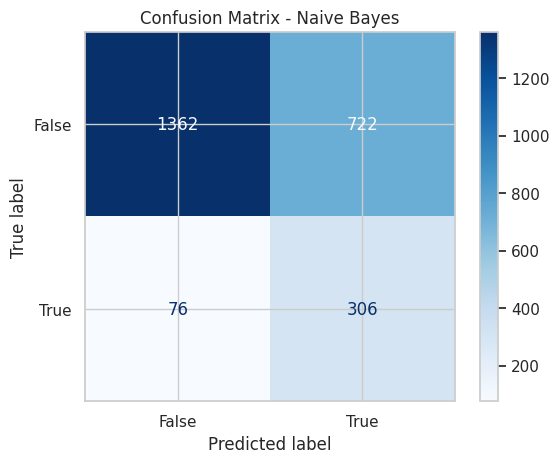

In [41]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

# Train Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_nb = nb_model.predict(X_test)

# Print performance metrics
print("Naive Bayes Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_nb):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_nb):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_nb):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_nb):.4f}")
print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred_nb):.4f}")

# Generate the confusion matrix
cm_nb = confusion_matrix(y_test, y_pred_nb)

# Display the confusion matrix
disp_nb = ConfusionMatrixDisplay(confusion_matrix=cm_nb, display_labels=nb_model.classes_)
disp_nb.plot(cmap='Blues')

# Show the plot
plt.title("Confusion Matrix - Naive Bayes")
plt.show()


### 4.5.5 K-Nearest Neighbor (KNN)


K-Nearest Neighbors (KNN) Performance:
Accuracy: 0.8686
Precision: 0.6368
Recall: 0.3534
F1 Score: 0.4545
ROC AUC Score: 0.6582


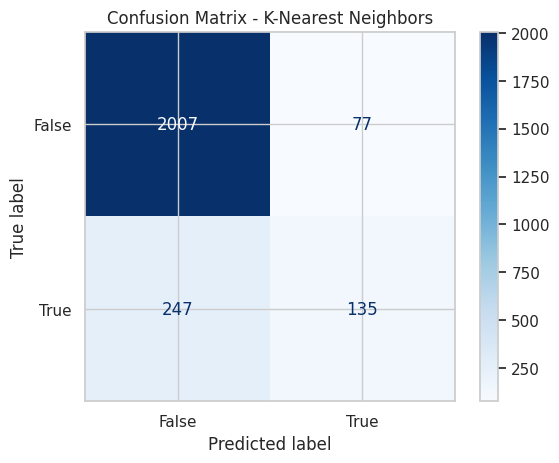

In [42]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

# Train K-Nearest Neighbors model
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors
knn_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_knn = knn_model.predict(X_test)

# Print performance metrics
print("K-Nearest Neighbors (KNN) Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_knn):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_knn):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_knn):.4f}")
print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred_knn):.4f}")

# Generate the confusion matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)

# Display the confusion matrix
disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=knn_model.classes_)
disp_knn.plot(cmap='Blues')

# Show the plot
plt.title("Confusion Matrix - K-Nearest Neighbors")
plt.show()


### 4.5.6 Support Vector Machines


Support Vector Machines (SVM) Performance:
Accuracy: 0.8844
Precision: 0.7012
Recall: 0.4424
F1 Score: 0.5425
ROC AUC Score: 0.7039


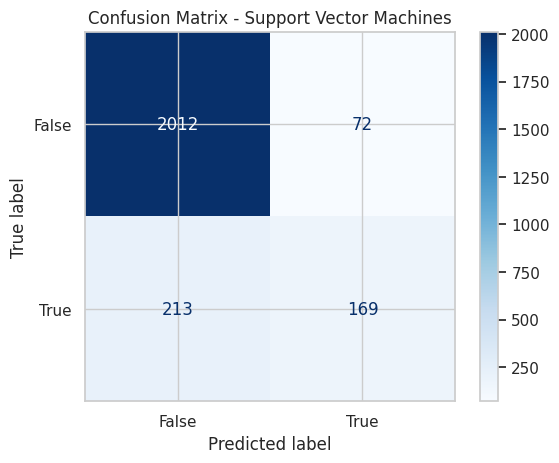

In [43]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

# Train Support Vector Machine model
svm_model = SVC(probability=True, random_state=42)
svm_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_svm = svm_model.predict(X_test)

# Print performance metrics
print("Support Vector Machines (SVM) Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_svm):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_svm):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_svm):.4f}")
print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred_svm):.4f}")

# Generate the confusion matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)

# Display the confusion matrix
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=svm_model.classes_)
disp_svm.plot(cmap='Blues')

# Show the plot
plt.title("Confusion Matrix - Support Vector Machines")
plt.show()


### 4.5.7 Multi-Layer Perceptron (MLP)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Neural Networks (MLP) Performance:
Accuracy: 0.8840
Precision: 0.6538
Recall: 0.5340
F1 Score: 0.5879
ROC AUC Score: 0.7411


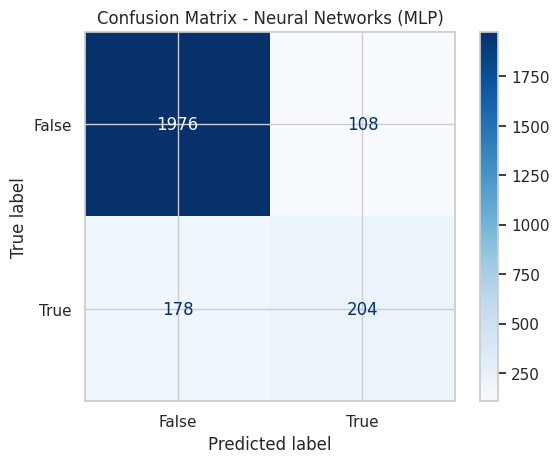

In [45]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

# Train Multi-Layer Perceptron model
mlp_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)
mlp_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_mlp = mlp_model.predict(X_test)

# Print performance metrics
print("Neural Networks (MLP) Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_mlp):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_mlp):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_mlp):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_mlp):.4f}")
print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred_mlp):.4f}")

# Generate the confusion matrix
cm_mlp = confusion_matrix(y_test, y_pred_mlp)

# Display the confusion matrix
disp_mlp = ConfusionMatrixDisplay(confusion_matrix=cm_mlp, display_labels=mlp_model.classes_)
disp_mlp.plot(cmap='Blues')

# Show the plot
plt.title("Confusion Matrix - Neural Networks (MLP)")
plt.show()


### 4.5.8 Gradient Boosting Machines (GBM)

Gradient Boosting Machines (GBM) Performance:
Accuracy: 0.9019
Precision: 0.7258
Recall: 0.5890
F1 Score: 0.6503
ROC AUC Score: 0.7741


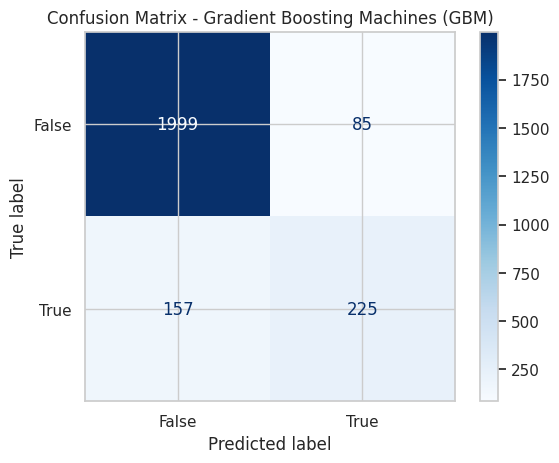

In [59]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

# Train Gradient Boosting Machine model
gbm_model = GradientBoostingClassifier(random_state=42)
gbm_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_gbm = gbm_model.predict(X_test)

# Print performance metrics
print("Gradient Boosting Machines (GBM) Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_gbm):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_gbm):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_gbm):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_gbm):.4f}")
print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred_gbm):.4f}")

# Generate the confusion matrix
cm_gbm = confusion_matrix(y_test, y_pred_gbm)

# Display the confusion matrix
disp_gbm = ConfusionMatrixDisplay(confusion_matrix=cm_gbm, display_labels=gbm_model.classes_)
disp_gbm.plot(cmap='Blues')

# Show the plot
plt.title("Confusion Matrix - Gradient Boosting Machines (GBM)")
plt.show()


### 4.5.9 XGBoost

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [10:31:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Performance:
Accuracy: 0.8933
Precision: 0.6745
Recall: 0.6021
F1 Score: 0.6362
ROC AUC Score: 0.7744


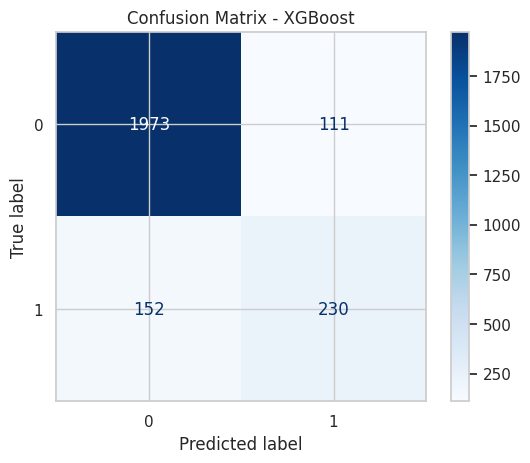

In [60]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

# Train XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_xgb = xgb_model.predict(X_test)

# Print performance metrics
print("XGBoost Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_xgb):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_xgb):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_xgb):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_xgb):.4f}")
print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred_xgb):.4f}")

# Generate the confusion matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

# Display the confusion matrix
disp_xgb = ConfusionMatrixDisplay(confusion_matrix=cm_xgb, display_labels=xgb_model.classes_)
disp_xgb.plot(cmap='Blues')

# Show the plot
plt.title("Confusion Matrix - XGBoost")
plt.show()


## 6- Insights and Conclusion